In [20]:
import matplotlib.pyplot as plt
from snaptools import plot_tools
import numpy as np
#import conversions as co
#import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import Grid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Ellipse
import h5py
import matplotlib.gridspec as gridspec
import conversions as co
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import ImageGrid
from snaptools import utils
from snaptools import snapio
from snaptools import CBcm
from snaptools import manipulate
from snaptools import simulation
from functools import partial
from scipy import ndimage
from scipy import stats
from scipy.ndimage import measurements as measure

%matplotlib inline
%load_ext autoreload
%autoreload 2
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('lines', linewidth=3)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def centers_of_mass(snapname):
    ptypes = ['gas', 'halo', 'stars', 'sfr']

    coms = []
    snap = snapio.load_snap(snapname)
    com1, com2, idgal, idgal2 = snap.center_of_mass(ptypes[0])
    coms.append(com1)
    
    allpos = snap.pos[ptypes[0]][idgal, :]
    allmasses = snap.masses[ptypes[0]][idgal]

    for ptype in ptypes[1:]:
            # check to make sure we have particles
            if (ptype in snap.pos.keys()) and (len(snap.pos[ptype]) > 0):
                com1, com2, idgal, idgal2 = snap.center_of_mass(ptype)
                coms.append(com1)

                # construct a list of positions and masses
                allpos = np.concatenate((snap.pos[ptype][idgal, :],
                                         allpos), axis=0)

                allmasses = np.concatenate((snap.masses[ptype][idgal],
                                            allmasses), axis=0)   
    
    com_all = np.sum(allpos*allmasses[..., np.newaxis], axis=0)/np.sum(allmasses[..., np.newaxis])
    coms.append(com_all)
    return np.array(coms)

In [18]:
coms = centers_of_mass(folder+"output_coalesce/snap_000")

In [23]:
sim = simulation.Simulation(folder+'output_coalesce/')

In [24]:
coms = [centers_of_mass(name) for name in sim.snaps]

In [25]:
coms = np.array(coms)

(122, 5, 3)

## All Centers of Mass (simulation origin)

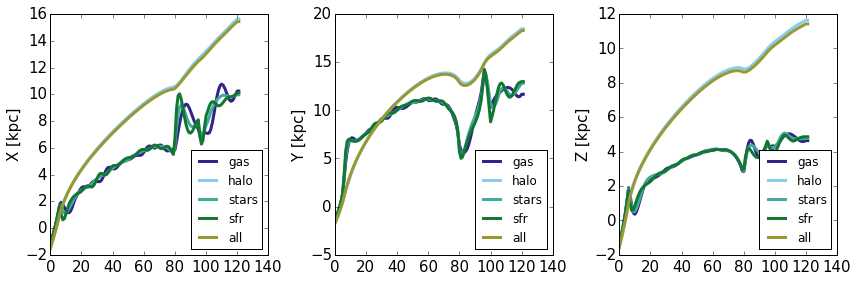

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ptypes = ['gas', 'halo', 'stars', 'sfr', 'all']
axes_names = ['X', 'Y', 'Z']
for i, axis in enumerate(axes):
    for j, ptype in enumerate(ptypes):
        axis.plot(coms[:, j, i], label=ptype)
    
    axis.set_ylabel('{} [kpc]'.format(axes_names[i]), fontsize=15)
    axis.legend(loc='lower right')
    
plt.tight_layout()

## Centers of Mass relative to stars

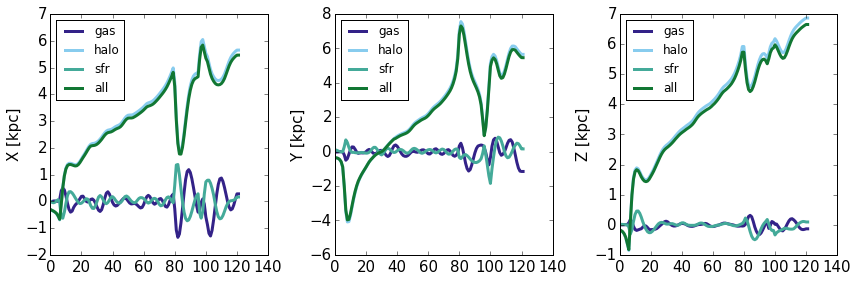

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ptypes = ['gas', 'halo', 'stars', 'sfr', 'all']
axes_names = ['X', 'Y', 'Z']
for i, axis in enumerate(axes):
    for j, ptype in enumerate(ptypes):
        if j == 2:  # skip itself
            continue 
            
        axis.plot(coms[:, j, i]-coms[:, 2, i], label=ptype)
    
    axis.set_ylabel('{} [kpc]'.format(axes_names[i]), fontsize=15)
    axis.legend(loc='upper left')
    
plt.tight_layout()

## X and Y centers of mass compared to measured centers

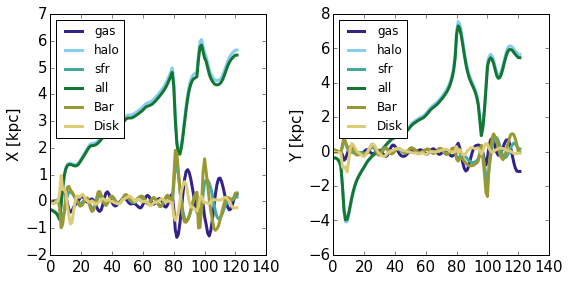

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ptypes = ['gas', 'halo', 'stars', 'sfr', 'all']
axes_names = ['X', 'Y']
for i, axis in enumerate(axes):
    for j, ptype in enumerate(ptypes):
        if j == 2:  # skip itself
            continue 
            
        axis.plot(coms[:, j, i]-coms[:, 2, i], label=ptype)
    axis.plot(offsets['main']['bar_pos'][:, i], label='Bar')
    axis.plot(offsets['main']['disk_pos'][:, i, 0], label='Disk')
        
    
    axis.set_ylabel('{} [kpc]'.format(axes_names[i]), fontsize=15)
    axis.legend(loc='upper left')
    
plt.tight_layout()

In [4]:
folder = '/usr/users/spardy/coors2/working/offsets_coalesce/'
offsets = h5py.File(folder+'offSets.hdf5')

In [5]:
diskdyn_dist = np.sqrt(np.sum((offsets['main']['disk_pos'][:, :, 0] -
                               offsets['main']['dynamical_center'][:, 0:2])**2, axis=1))

bardyn_dist = np.sqrt(np.sum((offsets['main']['bar_pos'][()] -
                              offsets['main']['dynamical_center'][:, 0:2])**2, axis=1))
times = offsets['main']['time'][()]
 

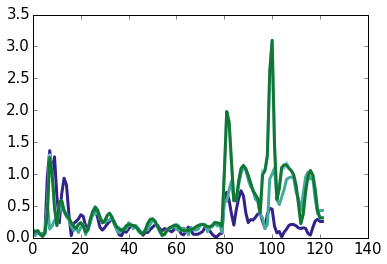

In [16]:
plt.plot(np.sqrt(np.sum(offsets['main']['disk_pos'][:, :, 0]**2, axis=1)))
plt.plot(np.sqrt(np.sum(offsets['main']['bar_pos'][()]**2, axis=1)))
plt.plot(np.sqrt(np.sum(offsets['main']['halo_pos'][()]**2, axis=1)))
plt.plot(np.sqrt(np.sum(offsets['main']['dynamical_center'][:, 0:2]**2, axis=1)))


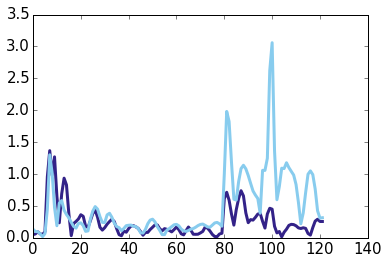

In [18]:
plt.plot(np.sqrt(np.sum(offsets['main']['disk_pos'][:, :, 0]**2, axis=1)))
plt.plot(np.sqrt(np.sum(offsets['main']['bar_pos'][()]**2, axis=1)))

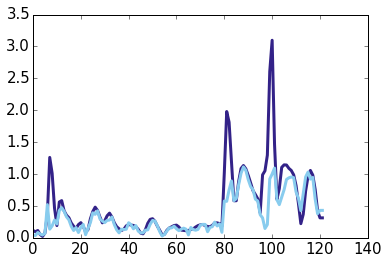

In [17]:
plt.plot(np.sqrt(np.sum(offsets['main']['dynamical_center'][:, 0:2]**2, axis=1)))
plt.plot(np.sqrt(np.sum(offsets['main']['halo_pos'][()]**2, axis=1)))
